In [1]:
import os

import pandas as pd

DATA_DIR = 'data/staging/logs/'

In [133]:
df = pd.read_csv(DATA_DIR + 'vmgr_sessions.csv', names=['date_time','auth'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6831 entries, 0 to 6830
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date_time  6831 non-null   object
 1   auth       6831 non-null   object
dtypes: object(2)
memory usage: 106.9+ KB


In [134]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['date'] = pd.to_datetime(df.date_time.dt.date)
df.head()

,date_time,auth,date
0,2018-12-17 20:14:05,jmancino,2018-12-17
1,2018-12-17 20:34:33,jmancino,2018-12-17
2,2018-12-18 07:30:14,gkeitner,2018-12-18
3,2018-12-18 07:36:23,rsoemedi,2018-12-18
4,2018-12-18 07:37:46,dmurphyd,2018-12-18


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6831 entries, 0 to 6830
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  6831 non-null   datetime64[ns]
 1   auth       6831 non-null   object        
 2   date       6831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 160.2+ KB


In [136]:
df = df.groupby(['date','auth']).count().reset_index()
df.head()

,date,auth,date_time
0,2018-12-17,jmancino,2
1,2018-12-18,aayalaph,3
2,2018-12-18,abchambe,1
3,2018-12-18,cbriant,1
4,2018-12-18,dmurphyd,1


In [137]:
df.rename(columns={'date_time':'logins'}, inplace=True)
df.set_index('date', drop=True, inplace=True)
df.head()

,auth,logins
date,,
2018-12-17,jmancino,2
2018-12-18,aayalaph,3
2018-12-18,abchambe,1
2018-12-18,cbriant,1
2018-12-18,dmurphyd,1


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4806 entries, 2018-12-17 to 2020-03-02
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   auth    4806 non-null   object
 1   logins  4806 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 112.6+ KB


In [139]:
df['unique_logins'] = df.groupby('date')['auth'].transform('count')
df['total_logins'] = df.groupby('date')['logins'].transform('sum')
df.drop(columns=['auth','logins'], inplace=True)
df.drop_duplicates(inplace=True)

In [140]:
print("Rows: {}".format(len(df)))
df.head()

Rows: 194


,unique_logins,total_logins
date,,
2018-12-17,1,2
2018-12-18,20,30
2018-12-19,12,21
2018-12-20,18,34
2018-12-21,23,32


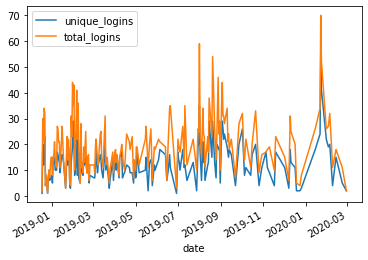

In [141]:
df.plot()